In [1]:
# Import Dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
# Read Crime Data
project_data = pd.read_csv("project_data.csv")

# Read CTA Data
cta_data = pd.read_csv("cta_data.csv")

In [3]:
# Assign Date Column to a Variable
all_dates_cta = cta_data["Date"]
all_dates = project_data["Date"]

# Convert All Dates to a Datetime 
[dt.datetime.strptime(x, "%Y-%m-%d") for x in all_dates_cta]

# Replace Date Column with Datetime Values
cta_data["Date"] = pd.to_datetime(all_dates_cta)

# Convert All Dates to a Datetime 
[dt.datetime.strptime(x, "%Y-%m-%d") for x in all_dates]

# Replace Date Column with Datetime Values
project_data["Date"] = pd.to_datetime(all_dates)

In [4]:
# set ridership count for year to 0 
ridership_2001 = 0
ridership_2002 = 0
ridership_2003 = 0
ridership_2004 = 0
ridership_2005 = 0
ridership_2006 = 0
ridership_2007 = 0
ridership_2008 = 0
ridership_2009 = 0
ridership_2010 = 0
ridership_2011 = 0
ridership_2012 = 0
ridership_2013 = 0
ridership_2014 = 0
ridership_2015 = 0
ridership_2016 = 0
ridership_2017 = 0
ridership_2018 = 0
ridership_2019 = 0
#For loop to get total rider count for each year 
for x in range(cta_data["Rail Boardings"].count()):    
    if cta_data["Date"].dt.year[x] == 2001:
        ridership_2001 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2002:
        ridership_2002 += cta_data["Rail Boardings"][x]    
    elif cta_data["Date"].dt.year[x] == 2003:
        ridership_2003 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2004:
        ridership_2004 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2005:
        ridership_2005 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2006:
        ridership_2006 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2007:
        ridership_2007 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2008:
        ridership_2008 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2009:
        ridership_2009 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2010:
        ridership_2010 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2011:
        ridership_2011 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2012:
        ridership_2012 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2013:
        ridership_2013 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2014:
        ridership_2014 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2015:
        ridership_2015 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2016:
        ridership_2016 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2017:
        ridership_2017 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2018:
        ridership_2018 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"].dt.year[x] == 2019:
        ridership_2019 += cta_data["Rail Boardings"][x]

In [5]:
# Assign All Years to a Variable - Project Data
year_2001 = project_data[project_data["Year"] == 2001]
year_2002 = project_data[project_data["Year"] == 2002]
year_2003 = project_data[project_data["Year"] == 2003]
year_2004 = project_data[project_data["Year"] == 2004]
year_2005 = project_data[project_data["Year"] == 2005]
year_2006 = project_data[project_data["Year"] == 2006]
year_2007 = project_data[project_data["Year"] == 2007]
year_2008 = project_data[project_data["Year"] == 2008]
year_2009 = project_data[project_data["Year"] == 2009]
year_2010 = project_data[project_data["Year"] == 2010]
year_2011 = project_data[project_data["Year"] == 2011]
year_2012 = project_data[project_data["Year"] == 2012]
year_2013 = project_data[project_data["Year"] == 2013]
year_2014 = project_data[project_data["Year"] == 2014]
year_2015 = project_data[project_data["Year"] == 2015]
year_2016 = project_data[project_data["Year"] == 2016]
year_2017 = project_data[project_data["Year"] == 2017]
year_2018 = project_data[project_data["Year"] == 2018]
year_2019 = project_data[project_data["Year"] == 2019]

# Created list of project data by year
plot_year = [year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014, year_2015, year_2016, year_2017, year_2018, year_2019]

# Created year list to plot 
year = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

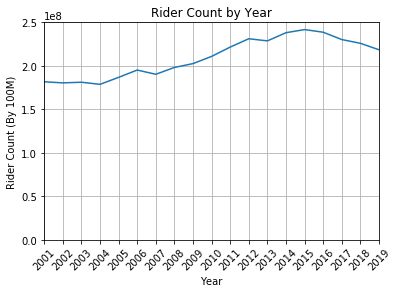

In [6]:
# Added ridership count for each year to list
ridership_count = [ridership_2001, ridership_2002, ridership_2003, ridership_2004, ridership_2005, ridership_2006, ridership_2007, ridership_2008, ridership_2009, ridership_2010, ridership_2011, ridership_2012, ridership_2013, ridership_2014, ridership_2015, ridership_2016, ridership_2017, ridership_2018, ridership_2019]

# Plot Figure
plt.plot(year, ridership_count)

# Plot X Ticks
plt.xticks(ticks = year, rotation = 45)

# Plot Y Labels
plt.ylabel("Rider Count (By 100M)")

# Plot X Labels
plt.xlabel("Year")

# Plot Title
plt.title("Rider Count by Year")

# Plot Grid
plt.grid()

# Plot Y Limit
plt.ylim(0, 250000000)

# Plot X Limit
plt.xlim(2001, 2019)

# Save Figure
plt.savefig("Graphs/Rider Count by Year.png")

# Show Figure
plt.show()


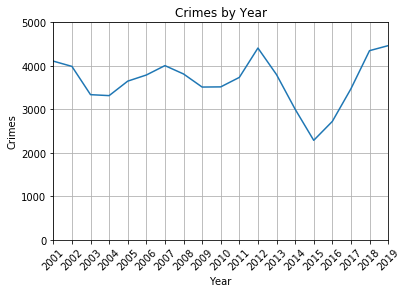

In [7]:
# Created empty list to append total crime count for that year
total_crime_year = []

# For loop to add total crime count to list above
for x in range(19):
    total_crime_year.append(plot_year[x]["Primary Type"].count())
    
#Plot Figure
plt.plot(year, total_crime_year)

# Plot X Ticks
plt.xticks(ticks = year, rotation = 45)

# Plot Y Labels
plt.ylabel("Crimes")

# Plot X Labels
plt.xlabel("Year")

# Plot Title
plt.title("Crimes by Year")

# Plot Grid
plt.grid()

# Plot Y Limit
plt.ylim(0, 5000)

# Plot X Limit
plt.xlim(2001, 2019)

# Save Figure
plt.savefig("Graphs/Crimes by Year.png")

# Show Figure
plt.show()

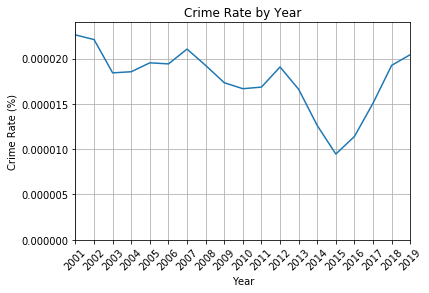

In [8]:
# Find Crime Rate
crime_year = []
for x in range(19):
    crime_year.append(total_crime_year[x] / ridership_count[x])

# Plot Figure
plt.plot(year, crime_year)

# Plot X Ticks
plt.xticks(ticks = year, rotation = 45)

# Plot Y Label
plt.ylabel("Crime Rate (%)")

# Plot X Label
plt.xlabel("Year")

# Plot Title
plt.title("Crime Rate by Year")

# Plot Grid
plt.grid()

# Plot X Limit
plt.xlim(2001, 2019)

# Plot Y Limit
plt.ylim(0, .000024)

# Save Figure
plt.savefig("Graphs/Crime Rate by Year.png")

# Show Figure
plt.show()

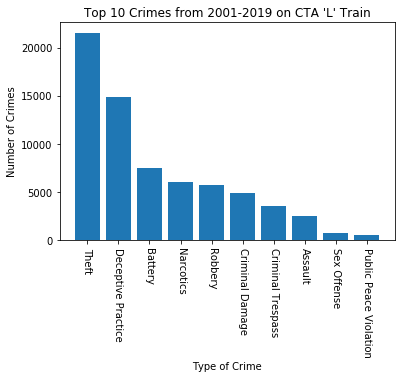

In [9]:
# Get Value Count of Crime
all_locations = project_data["Primary Type"].value_counts()

# Focus Only On Top 10
all_locations = all_locations.head(10)

# Set X Axis
x_axis = np.arange(len(all_locations))

# Create Bar Graph for Top 10 Crimes
plt.bar(x_axis, all_locations)

# Create X&Y Labels, and Title
plt.ylabel("Number of Crimes")
plt.xlabel("Type of Crime")
plt.title("Top 10 Crimes from 2001-2019 on CTA 'L' Train")

# Set Tick Locations
tick_locations = [value for value in x_axis]

# Set XTicks
plt.xticks(tick_locations, ["Theft", "Deceptive Practice", "Battery", "Narcotics", "Robbery", "Criminal Damage", "Criminal Trespass", "Assault",  "Sex Offense", "Public Peace Violation"], rotation = 270)

# Save Figure
plt.savefig("Graphs/Top 10 Crimes from 2001-2019 on CTA 'L' Train.png")

# Display Graph
plt.show()

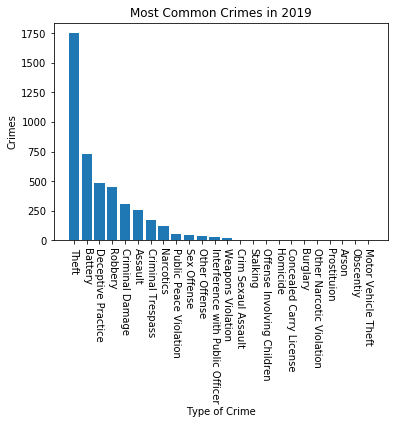

In [10]:
# Create Variable to Hold Value Count
type_of_crime = year_2019["Primary Type"].value_counts()

# Set X Axis
x_axis = np.arange(len(type_of_crime))

# Create Bar Graph
plt.bar(x_axis, type_of_crime)

# Create Y Label
plt.ylabel("Crimes")

# Create X Label
plt.xlabel("Type of Crime")

# Create Title
plt.title("Most Common Crimes in 2019")

# Create Tick Locations
tick_locations = [value for value in x_axis]

# Create X Ticks
plt.xticks(tick_locations, ["Theft", "Battery", "Deceptive Practice", "Robbery", "Criminal Damage", "Assault", "Criminal Trespass", "Narcotics", "Public Peace Violation", "Sex Offense", "Other Offense", "Interference with Public Officer", "Weapons Violation", "Crim Sexaul Assault", "Stalking", "Offense Involving Children", "Homicide", "Concealed Carry License", "Burglary", "Other Narcotic Violation", "Prostituion", "Arson", "Obscentiy", "Motor Vehicle Theft"], rotation = 270)

# Save Figure
plt.savefig("Graphs/Most Common Crimes in 2019.png")

# Show Figure
plt.show()

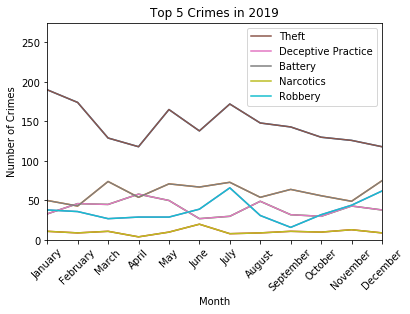

In [11]:
# Create Variables for each month in 2019
january_2019 = year_2019[year_2019["Date"].dt.month == 1]
february_2019 = year_2019[year_2019["Date"].dt.month == 2]
march_2019 = year_2019[year_2019["Date"].dt.month == 3]
april_2019 = year_2019[year_2019["Date"].dt.month == 4]
may_2019 = year_2019[year_2019["Date"].dt.month == 5]
june_2019 = year_2019[year_2019["Date"].dt.month == 6]
july_2019 = year_2019[year_2019["Date"].dt.month == 7]
august_2019 = year_2019[year_2019["Date"].dt.month == 8]
september_2019 = year_2019[year_2019["Date"].dt.month == 9]
october_2019 = year_2019[year_2019["Date"].dt.month == 10]
november_2019 = year_2019[year_2019["Date"].dt.month == 11]
december_2019 = year_2019[year_2019["Date"].dt.month == 12]

# Created a List to Hold Months in 2019
month_2019 = [january_2019, february_2019, march_2019, april_2019, may_2019, june_2019, july_2019, august_2019, september_2019, october_2019, november_2019, december_2019]

# Created a List to Hold Month Labels
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Created Empty Lists to hold Each Crime's Data
theft = []
deceptive_practice = []
battery = []
narcotics = []
robbery = []

# Create a For Loop to Add Each Crime's Data to Their Empty List 
for x in range(len(month_2019)):
    theft.append(len(month_2019[x][month_2019[x]["Primary Type"] == "THEFT"]))
    deceptive_practice.append(len(month_2019[x][month_2019[x]["Primary Type"] == "DECEPTIVE PRACTICE"]))
    battery.append(len(month_2019[x][month_2019[x]["Primary Type"] == "BATTERY"]))
    narcotics.append(len(month_2019[x][month_2019[x]["Primary Type"] == "NARCOTICS"]))
    robbery.append(len(month_2019[x][month_2019[x]["Primary Type"] == "ROBBERY"]))

# Create a Plot to See Crime Pattern in 2019 for Top 5 Crimes   
plt.plot(month, theft)
plt.plot(month, battery)
plt.plot(month, deceptive_practice)
plt.plot(month, narcotics)
plt.plot(month, robbery)

# Plot XTicks, Label, Y&Y Limit, and X&Y Labels
plt.xticks(rotation = 45)
plt.title("Top 5 Crimes in 2019")
plt.ylabel("Number of Crimes")
plt.xlabel("Month")
plt.ylim(0, 275)
plt.xlim("January", "December")

# Created Handles
theft_handle,= plt.plot(month, theft, label = "Theft")
deceptive_handle,= plt.plot(month, deceptive_practice, label = "Deceptive Practice")
battery_handle,= plt.plot(month, battery, label = "Battery")
narcotics_handle,= plt.plot(month, narcotics, label = "Narcotics")
robbery_handle,= plt.plot(month, robbery, label = "Robbery")

# Created Legend
plt.legend(handles = [theft_handle, deceptive_handle, battery_handle, narcotics_handle, robbery_handle], loc="best")

# Save Figure
plt.savefig("Graphs/Top 5 Crimes in 2019.png")

# Display Figure
plt.show()

In [12]:
# Sort CTA Data by L Ridership Total
lowest_boarding = cta_data.sort_values("Rail Boardings", ascending=True)

# Isolate Only Date Column
lowest_boarding = lowest_boarding["Date"].reset_index(drop = True) 

# Display Least Popular Days to Ride L
print(f"Top 5 Least Riden Days on 'L' (2001-2019): \n{lowest_boarding.head()}")
print("--------------------------")

# Isolate Data from December 2004
december_2004 = year_2004[year_2004["Date"].dt.month == 12]

# Isolate Data from December 25, 2004
december_25_2004 = december_2004[december_2004["Date"].dt.day == 25]

# Find Number of Crimes Committed on December 25, 2004
crimes_christmas_2004 = len(december_25_2004)

# Find Average Number of Crimes per Day in 2004
average_crime_2004 = (len(year_2004)) / 366

# Find Average Number oif Crimes per Day for All Data
average_crime_all = len(project_data) / 6575

# Print Findings
print(f"The day the 'L' was taken the least from 2001-2019: {lowest_boarding[0]}")
print(f"The number of crimes that occurred on December 25, 2004: {crimes_christmas_2004}")
print(f"The number of crimes that occured on an average day in 2004: {average_crime_2004}")
print(f"The number of crimes that occured on an average day (2001-2019): {average_crime_all}")
print("--------------------------")

# Sort CTA Data by L Ridership Total
highest_boarding = cta_data.sort_values("Rail Boardings", ascending=False)

# Isolate Only Date Column
highest_boarding = highest_boarding["Date"].reset_index(drop = True) 

# Display Most Popular Days to Ride L

print(f"Top 5 Most Riden Days on 'L' (2001-2019): \n{highest_boarding.head()}")
print("--------------------------")

# Isolate Data from November 2016
november_2016 = year_2016[year_2016["Date"].dt.month == 11]

# Isolate Data from November 4, 2016
november_04_2016 = november_2016[november_2016["Date"].dt.day == 4]

# Find Number of Crimes Committed on November 4, 2016
crimes_cubs_parade = len(november_04_2016)

# Find Average Number of Crimes per Day in 2016
average_crime_2016 = (len(year_2016)) / 366

# Print Findings
print(f"The day the 'L' was taken the most from 2001-2019: {highest_boarding[0]}")
print(f"The number of crimes that occurred on November 04, 2016: {crimes_cubs_parade}")
print(f"The number of crimes that occured on an average day in 2016: {average_crime_2016}")
print(f"The number of crimes that occured on an average day (2001-2019): {average_crime_all}")

Top 5 Least Riden Days on 'L' (2001-2019): 
0   2004-12-25
1   2001-12-25
2   2002-12-25
3   2019-01-30
4   2003-12-25
Name: Date, dtype: datetime64[ns]
--------------------------
The day the 'L' was taken the least from 2001-2019: 2004-12-25 00:00:00
The number of crimes that occurred on December 25, 2004: 6
The number of crimes that occured on an average day in 2004: 9.057377049180328
The number of crimes that occured on an average day (2001-2019): 10.535057034220532
--------------------------
Top 5 Most Riden Days on 'L' (2001-2019): 
0   2016-11-04
1   2016-10-28
2   2015-06-18
3   2008-07-03
4   2013-06-28
Name: Date, dtype: datetime64[ns]
--------------------------
The day the 'L' was taken the most from 2001-2019: 2016-11-04 00:00:00
The number of crimes that occurred on November 04, 2016: 14
The number of crimes that occured on an average day in 2016: 7.437158469945355
The number of crimes that occured on an average day (2001-2019): 10.535057034220532


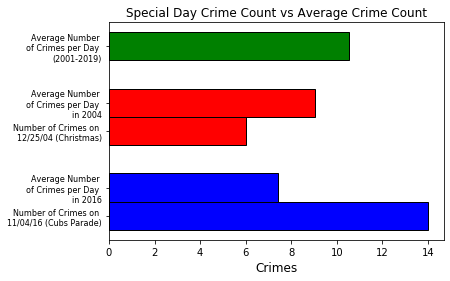

In [13]:
# Set Width
width = 1      

# Set Spacing
spacing = 1

# Set Horizontal Bar X Values for 2016
hbar_2016_x = [crimes_cubs_parade, average_crime_2016]

# Set Horizontal Bar X Values for 2004
hbar_2004_x = [crimes_christmas_2004, average_crime_2004]

# Set Horizontal Bar X Values for All Years
hbar_all_x = [average_crime_all]

# Set Horizontal Bar Y Values for 2004
hbar_2016_y = np.arange(len(hbar_2016_x))

# Set Horizontal Bar Y Values for 2016
hbar_2004_y = np.arange(len(hbar_2004_x))+spacing+len(hbar_2016_x)

# Set Horizontal Bar Y Values for All Years
hbar_all_y = np.arange(len(hbar_all_x))+spacing+len(hbar_2004_x)+spacing+len(hbar_2016_x)

# Concattenate Y Values for Y Ticks
yticks = np.concatenate((hbar_2016_y,hbar_2004_y,hbar_all_y))

# Create Figure and Set Variable ax
fig, ax = plt.subplots()

# Create Subplot For 2016
ax.barh(hbar_2016_y, hbar_2016_x, width, color='b',  edgecolor= "black",label="")

# Create Subplot For 2004
ax.barh(hbar_2004_y, hbar_2004_x, width, color='r',  edgecolor= "black",label="")

# Create Subplot For All Years
ax.barh(hbar_all_y, hbar_all_x, width, color='g',  edgecolor= "black",label="")

# Create Title
ax.set_title("Special Day Crime Count vs Average Crime Count")

# Create X Label
ax.set_xlabel("Crimes",fontsize=12)

# Create Y Ticks
ax.set_yticks(yticks)

# Create Y Tick Labels
ax.set_yticklabels(("Number of Crimes on \n11/04/16 (Cubs Parade)", "Average Number \nof Crimes per Day \nin 2016", "Number of Crimes on \n12/25/04 (Christmas)", "Average Number \nof Crimes per Day \nin 2004", "Average Number \nof Crimes per Day \n(2001-2019)"),fontsize=8)

# Save Graph
plt.savefig("Graphs/Special Day Crime Count vs Average Crime Count.png")

# Show Plot
plt.show()

In [14]:
# Assign All Years to a Variable - Project Data
year_2001 = project_data[project_data["Year"] == 2001]
year_2002 = project_data[project_data["Year"] == 2002]
year_2003 = project_data[project_data["Year"] == 2003]
year_2004 = project_data[project_data["Year"] == 2004]
year_2005 = project_data[project_data["Year"] == 2005]
year_2006 = project_data[project_data["Year"] == 2006]
year_2007 = project_data[project_data["Year"] == 2007]
year_2008 = project_data[project_data["Year"] == 2008]
year_2009 = project_data[project_data["Year"] == 2009]
year_2010 = project_data[project_data["Year"] == 2010]
year_2011 = project_data[project_data["Year"] == 2011]
year_2012 = project_data[project_data["Year"] == 2012]
year_2013 = project_data[project_data["Year"] == 2013]
year_2014 = project_data[project_data["Year"] == 2014]
year_2015 = project_data[project_data["Year"] == 2015]
year_2016 = project_data[project_data["Year"] == 2016]
year_2017 = project_data[project_data["Year"] == 2017]
year_2018 = project_data[project_data["Year"] == 2018]
year_2019 = project_data[project_data["Year"] == 2019]

# Create a List for Each Year to Hold Crime Month Data
months_2001 = []
months_2002 = []
months_2003 = []
months_2004 = []
months_2005 = []
months_2006 = []
months_2007 = []
months_2008 = []
months_2009 = []
months_2010 = []
months_2011 = []
months_2012 = []
months_2013 = []
months_2014 = []
months_2015 = []
months_2016 = []
months_2017 = []
months_2018 = []
months_2019 = []


# Create For Loops to Add Crime Totals For Each Month
for x in range (12):
    months_2001.append(len(year_2001[year_2001["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2002.append(len(year_2002[year_2002["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2003.append(len(year_2003[year_2003["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2004.append(len(year_2004[year_2004["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2005.append(len(year_2005[year_2005["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2006.append(len(year_2006[year_2006["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2007.append(len(year_2007[year_2007["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2008.append(len(year_2008[year_2008["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2009.append(len(year_2009[year_2009["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2010.append(len(year_2010[year_2010["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2011.append(len(year_2011[year_2011["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2012.append(len(year_2012[year_2012["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2013.append(len(year_2013[year_2013["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2014.append(len(year_2014[year_2014["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2015.append(len(year_2015[year_2015["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2016.append(len(year_2016[year_2016["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2017.append(len(year_2017[year_2017["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2018.append(len(year_2018[year_2018["Date"].dt.month == (x+1)]))
for x in range (12):
    months_2019.append(len(year_2019[year_2019["Date"].dt.month == (x+1)]))

# Create a List to Hold All Monthly Crime Values
all_years = [months_2001, months_2002, months_2003, months_2004, months_2005, months_2006, months_2007, months_2008, months_2009, months_2010, months_2011, months_2012, months_2013, months_2014, months_2015, months_2016, months_2017, months_2018, months_2019]

# Create an Empty List That Will Hold Monthly Crime Values
crime_month_list = []

# Create a For Loop to Create One List
for sublist in all_years:
    for item in sublist:
        crime_month_list.append(item)

In [15]:
# Assign All Years to a Variable - CTA Data
year_2001_cta = cta_data[cta_data["Date"].dt.year == 2001]
year_2002_cta = cta_data[cta_data["Date"].dt.year == 2002]
year_2003_cta = cta_data[cta_data["Date"].dt.year == 2003]
year_2004_cta = cta_data[cta_data["Date"].dt.year == 2004]
year_2005_cta = cta_data[cta_data["Date"].dt.year == 2005]
year_2006_cta = cta_data[cta_data["Date"].dt.year == 2006]
year_2007_cta = cta_data[cta_data["Date"].dt.year == 2007]
year_2008_cta = cta_data[cta_data["Date"].dt.year == 2008]
year_2009_cta = cta_data[cta_data["Date"].dt.year == 2009]
year_2010_cta = cta_data[cta_data["Date"].dt.year == 2010]
year_2011_cta = cta_data[cta_data["Date"].dt.year == 2011]
year_2012_cta = cta_data[cta_data["Date"].dt.year == 2012]
year_2013_cta = cta_data[cta_data["Date"].dt.year == 2013]
year_2014_cta = cta_data[cta_data["Date"].dt.year == 2014]
year_2015_cta = cta_data[cta_data["Date"].dt.year == 2015]
year_2016_cta = cta_data[cta_data["Date"].dt.year == 2016]
year_2017_cta = cta_data[cta_data["Date"].dt.year == 2017]
year_2018_cta = cta_data[cta_data["Date"].dt.year == 2018]
year_2019_cta = cta_data[cta_data["Date"].dt.year == 2019]

# Create a List for Each Year to Hold CTA Month Data
months_2001_cta = []
months_2002_cta = []
months_2003_cta = []
months_2004_cta = []
months_2005_cta = []
months_2006_cta = []
months_2007_cta = []
months_2008_cta = []
months_2009_cta = []
months_2010_cta = []
months_2011_cta = []
months_2012_cta = []
months_2013_cta = []
months_2014_cta = []
months_2015_cta = []
months_2016_cta = []
months_2017_cta = []
months_2018_cta = []
months_2019_cta = []


# Create For Loops to Add CTA Totals For Each Month
for x in range (12):
    months_2001_cta.append(year_2001_cta[year_2001_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2002_cta.append(year_2002_cta[year_2002_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2003_cta.append(year_2003_cta[year_2003_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2004_cta.append(year_2004_cta[year_2004_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2005_cta.append(year_2005_cta[year_2005_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2006_cta.append(year_2006_cta[year_2006_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2007_cta.append(year_2007_cta[year_2007_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2008_cta.append(year_2008_cta[year_2008_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2009_cta.append(year_2009_cta[year_2009_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2010_cta.append(year_2010_cta[year_2010_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2011_cta.append(year_2011_cta[year_2011_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2012_cta.append(year_2012_cta[year_2012_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2013_cta.append(year_2013_cta[year_2013_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2014_cta.append(year_2014_cta[year_2014_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2015_cta.append(year_2015_cta[year_2015_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2016_cta.append(year_2016_cta[year_2016_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2017_cta.append(year_2017_cta[year_2017_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2018_cta.append(year_2018_cta[year_2018_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())
for x in range (12):
    months_2019_cta.append(year_2019_cta[year_2019_cta["Date"].dt.month == (x+1)]["Rail Boardings"].sum())

# Create a List to Hold All Monthly CTA Values
all_years_cta = [months_2001_cta, months_2002_cta, months_2003_cta, months_2004_cta, months_2005_cta, months_2006_cta, months_2007_cta, months_2008_cta, months_2009_cta, months_2010_cta, months_2011_cta, months_2012_cta, months_2013_cta, months_2014_cta, months_2015_cta, months_2016_cta, months_2017_cta, months_2018_cta, months_2019_cta]

# Create an Empty List That Will Hold Monthly CTA Values
cta_month_list = []

# Create a For Loop to Create One List
for sublist in all_years_cta:
    for item in sublist:
        cta_month_list.append(item)

The correlation coefficient between CTA 'L' Ridership and CTA 'L' Crime is -0.04


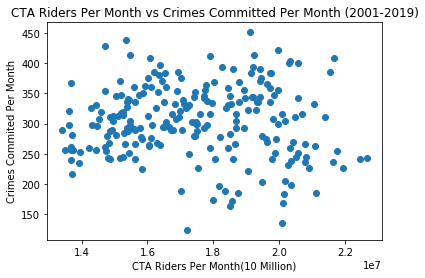

In [16]:
print(f"The correlation coefficient between CTA 'L' Ridership and CTA 'L' Crime is {round(stats.pearsonr(cta_month_list,crime_month_list)[0],2)}")

plt.scatter(cta_month_list,crime_month_list)
plt.xlabel("CTA Riders Per Month(10 Million)")
plt.ylabel("Crimes Commited Per Month")
plt.title("CTA Riders Per Month vs Crimes Committed Per Month (2001-2019)")

plt.show()